# First steps

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
#Cargar datos csv
data = pd.read_csv('Extended_Performance.csv')

In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df

In [4]:
df_exploration(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [7]:
# Standardize the column names
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [9]:
data.columns

Index(['employee_id', 'department', 'gender', 'age', 'job_title', 'hire_date',
       'years_at_company', 'education_level', 'performance_score',
       'monthly_salary', 'work_hours_per_week', 'projects_handled',
       'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size',
       'training_hours', 'promotions', 'employee_satisfaction_score',
       'resigned'],
      dtype='object')

In [8]:
data.describe()

,employee_id,age,years_at_company,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [10]:
data['department'].value_counts() 

department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

In [11]:
data['gender'].value_counts() 

gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

In [13]:
data['job_title'].value_counts() 

job_title
Specialist    14507
Manager       14325
Technician    14285
Analyst       14261
Engineer      14217
Consultant    14210
Developer     14195
Name: count, dtype: int64

In [14]:
data['hire_date'].value_counts() 

hire_date
2020-09-29 08:03:05.556036    46
2017-04-25 08:03:05.556036    46
2015-06-06 08:03:05.556036    46
2020-08-08 08:03:05.556036    45
2021-09-26 08:03:05.556036    45
                              ..
2019-01-04 08:03:05.556036    13
2024-06-12 08:03:05.556036    13
2017-07-15 08:03:05.556036    13
2015-09-15 08:03:05.556036    12
2016-12-28 08:03:05.556036    12
Name: count, Length: 3650, dtype: int64

In [15]:
data['years_at_company'].value_counts() 

years_at_company
2     10272
4     10103
0     10083
6     10068
1     10018
8      9961
3      9935
7      9892
5      9892
9      9732
10       44
Name: count, dtype: int64

In [17]:
data['education_level'].value_counts()

education_level
Bachelor       50041
High School    30004
Master         14904
PhD             5051
Name: count, dtype: int64

In [19]:
education_mapping = {'High School': 1,'Bachelor': 2, 'Master': 3, 'PhD': 4}
    
# Apply the mapping to the column
data['education_level'] = data['education_level'].map(education_mapping)

In [16]:
data['performance_score'].value_counts()

performance_score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

In [20]:
data['projects_handled'].value_counts()

projects_handled
10    2105
42    2086
47    2080
2     2079
49    2075
6     2075
37    2066
7     2054
38    2053
17    2048
9     2044
13    2044
19    2043
30    2029
15    2029
3     2023
1     2017
36    2016
14    2015
16    2012
22    2011
12    2007
35    2002
43    2001
32    1996
29    1994
4     1993
46    1993
31    1992
21    1991
27    1988
48    1977
11    1976
8     1975
0     1973
5     1969
34    1958
39    1957
33    1956
25    1956
18    1955
24    1948
44    1944
28    1940
26    1939
20    1934
45    1934
41    1930
23    1930
40    1888
Name: count, dtype: int64

In [21]:
data['resigned'].value_counts()

resigned
False    89990
True     10010
Name: count, dtype: int64

In [38]:
data_numerics = data[['age', 'years_at_company', 'performance_score', 'monthly_salary', 'work_hours_per_week', 'projects_handled', 'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size', 'training_hours', 'promotions', 'employee_satisfaction_score']]
data_categorical = data[['department', 'gender', 'job_title', 'education_level']]
data_target = data['resigned']

In [24]:
data[['age', 'years_at_company', 'education_level', 'performance_score', 'monthly_salary', 'work_hours_per_week', 'projects_handled', 'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size', 'training_hours', 'promotions', 'employee_satisfaction_score', 'resigned']].corr()

,age,years_at_company,education_level,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned
age,1.000000,0.000078,0.003824,0.001598,0.002757,-0.003050,-0.001726,0.001875,0.006981,-0.004672,-0.003411,0.002045,-0.002888,-0.000124,0.003519
years_at_company,0.000078,1.000000,-0.000911,0.001598,-0.000645,0.002578,0.002963,0.001965,-0.004371,-0.002443,0.003250,0.002696,-0.002737,-0.003180,0.000784
education_level,0.003824,-0.000911,1.000000,0.001827,0.005556,-0.001812,-0.001520,0.007493,-0.002601,0.002372,0.001192,-0.000826,0.000770,-0.003167,0.001254
performance_score,0.001598,0.001598,0.001827,1.000000,0.510035,-0.005627,0.000640,-0.001312,0.002994,0.001733,-0.005174,0.002358,-0.003501,0.001696,-0.002714
monthly_salary,0.002757,-0.000645,0.005556,0.510035,1.000000,-0.002347,-0.001925,-0.003029,0.003610,-0.000464,0.002972,-0.001088,-0.001940,0.001083,-0.001524
work_hours_per_week,-0.003050,0.002578,-0.001812,-0.005627,-0.002347,1.000000,-0.004183,0.005787,-0.000838,-0.004618,0.000790,0.001287,0.000238,0.000530,0.000145
projects_handled,-0.001726,0.002963,-0.001520,0.000640,-0.001925,-0.004183,1.000000,0.004107,-0.004995,0.000484,0.003813,0.002211,-0.002344,0.006126,-0.001713
overtime_hours,0.001875,0.001965,0.007493,-0.001312,-0.003029,0.005787,0.004107,1.000000,0.004255,-0.004349,0.002175,0.002939,-0.002537,0.001052,0.002383
sick_days,0.006981,-0.004371,-0.002601,0.002994,0.003610,-0.000838,-0.004995,0.004255,1.000000,0.000478,0.000149,0.000347,-0.003044,-0.000893,0.001711
remote_work_frequency,-0.004672,-0.002443,0.002372,0.001733,-0.000464,-0.004618,0.000484,-0.004349,0.000478,1.000000,-0.000668,0.005227,-0.000537,-0.001408,0.007205


## EDA categorical columns

In [25]:
def eda_uni_cat(df, col):
    # Create the frequency table with percentages
    freq_table = pd.DataFrame({'Frecuencia relativa (%)': df[col].value_counts(normalize=True) * 100})

    # Visualize the frequency in a countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Gráfico de frecuencia para la columna: {col}')
    plt.ylabel('Frecuencia absoluta')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=90)
    plt.show()

    return freq_table


def eda_bi_cat(df, cat_col, target_cat_col):
    #Create a crosstab with percentages
    crosstab = pd.crosstab(df[cat_col], df[target_cat_col], normalize='index') * 100

    #Calculate the P-value and Cramer's value
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[cat_col], df[target_cat_col]))

    cramer_v = association((pd.crosstab(df[cat_col], df[target_cat_col])), method="cramer")

    #Print the results
    print(f"p-value de Chi-cuadrado: {p:.4f}")
    print(f"Cramér's V: {cramer_v:.4f}\n")

    # Visualize the results with a barplot with percentages
    crosstab_plot = crosstab.reset_index().melt(id_vars=[cat_col], var_name=target_cat_col, value_name='percentage')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=crosstab_plot, x=cat_col, y='percentage', hue=target_cat_col, palette='viridis')
    plt.title(f'Percentage of {target_cat_col} by {cat_col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(cat_col.capitalize())
    plt.xticks(rotation=90)
    plt.legend(title=target_cat_col)


    return crosstab

### Department

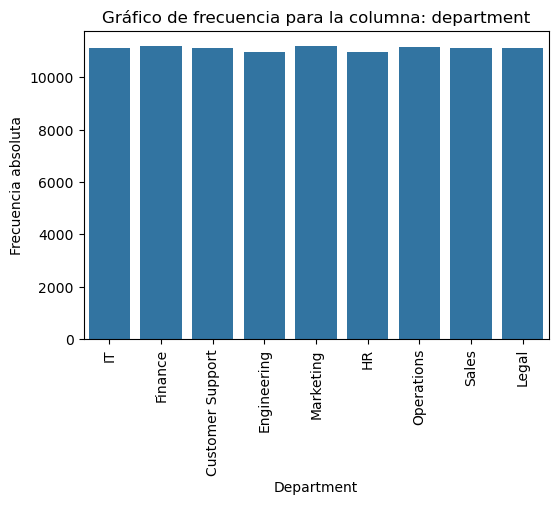

,Frecuencia relativa (%)
department,
Marketing,11.216
Finance,11.200
Operations,11.181
IT,11.131
Sales,11.122
Legal,11.118
Customer Support,11.116
HR,10.960
Engineering,10.956


In [26]:
eda_uni_cat(data, 'department')

p-value de Chi-cuadrado: 0.3274
Cramér's V: 0.0096



resigned,False,True
department,,
Customer Support,90.122346,9.877654
Engineering,90.352318,9.647682
Finance,89.464286,10.535714
HR,89.735401,10.264599
IT,90.441110,9.558890
Legal,89.782335,10.217665
Marketing,89.969686,10.030314
Operations,89.974063,10.025937
Sales,90.073728,9.926272


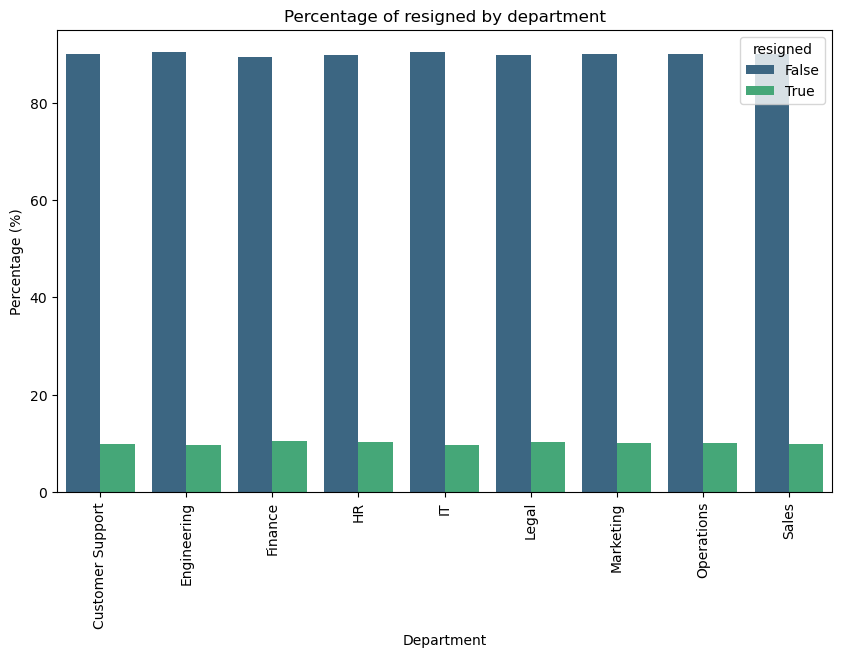

In [29]:
eda_bi_cat(data, 'department', 'resigned')

### Resigned

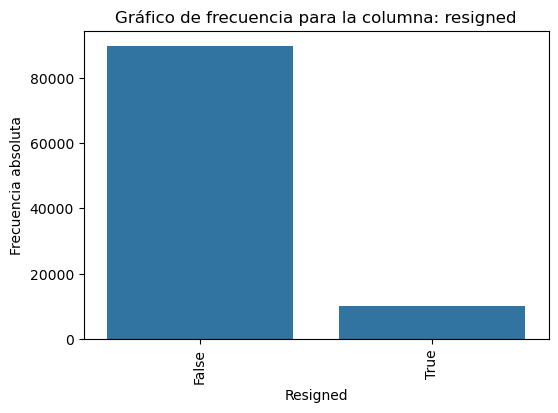

,Frecuencia relativa (%)
resigned,
False,89.99
True,10.01


In [30]:
eda_uni_cat(data, 'resigned')

### Gender

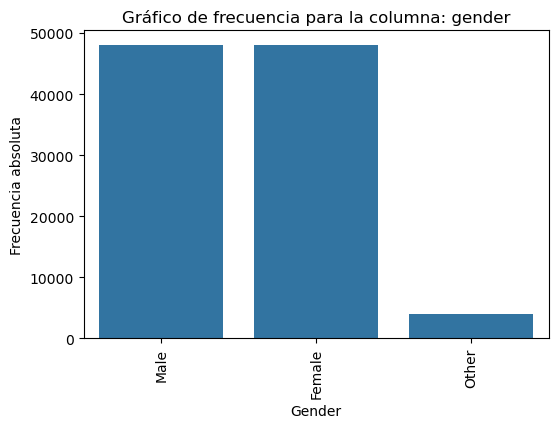

,Frecuencia relativa (%)
gender,
Male,48.031
Female,48.001
Other,3.968


In [31]:
eda_uni_cat(data, 'gender')

p-value de Chi-cuadrado: 0.8523
Cramér's V: 0.0018



resigned,False,True
gender,,
Female,89.966876,10.033124
Male,89.991880,10.008120
Other,90.246976,9.753024


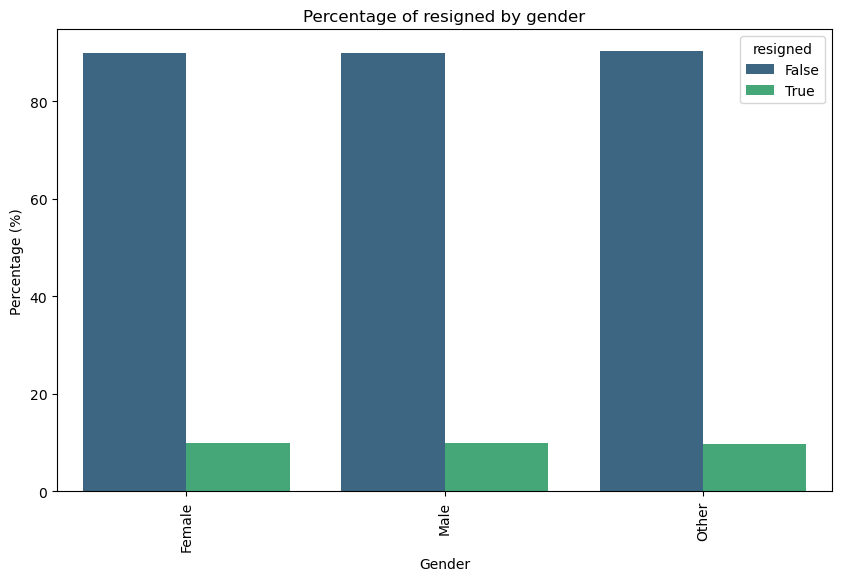

In [32]:
eda_bi_cat(data, 'gender', 'resigned')

### Job title

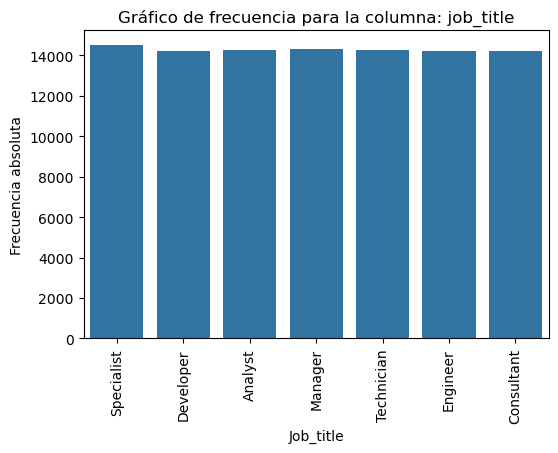

,Frecuencia relativa (%)
job_title,
Specialist,14.507
Manager,14.325
Technician,14.285
Analyst,14.261
Engineer,14.217
Consultant,14.210
Developer,14.195


In [33]:
eda_uni_cat(data, 'job_title')

p-value de Chi-cuadrado: 0.8435
Cramér's V: 0.0052



resigned,False,True
job_title,,
Analyst,89.832410,10.167590
Consultant,89.936664,10.063336
Developer,90.059880,9.940120
Engineer,90.201871,9.798129
Manager,89.738220,10.261780
Specialist,90.163369,9.836631
Technician,89.996500,10.003500


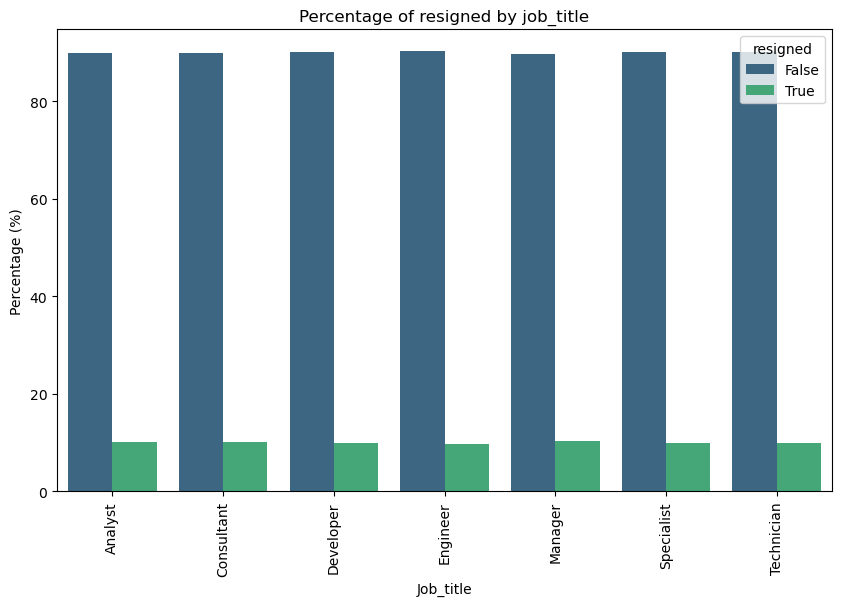

In [34]:
eda_bi_cat(data, 'job_title', 'resigned')

### Education level

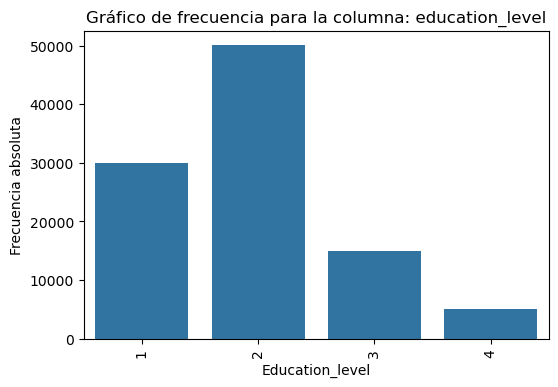

,Frecuencia relativa (%)
education_level,
2,50.041
1,30.004
3,14.904
4,5.051


In [35]:
eda_uni_cat(data, 'education_level')

p-value de Chi-cuadrado: 0.9068
Cramér's V: 0.0024



resigned,False,True
education_level,,
1,90.004666,9.995334
2,90.002198,9.997802
3,90.022813,9.977187
4,89.685211,10.314789


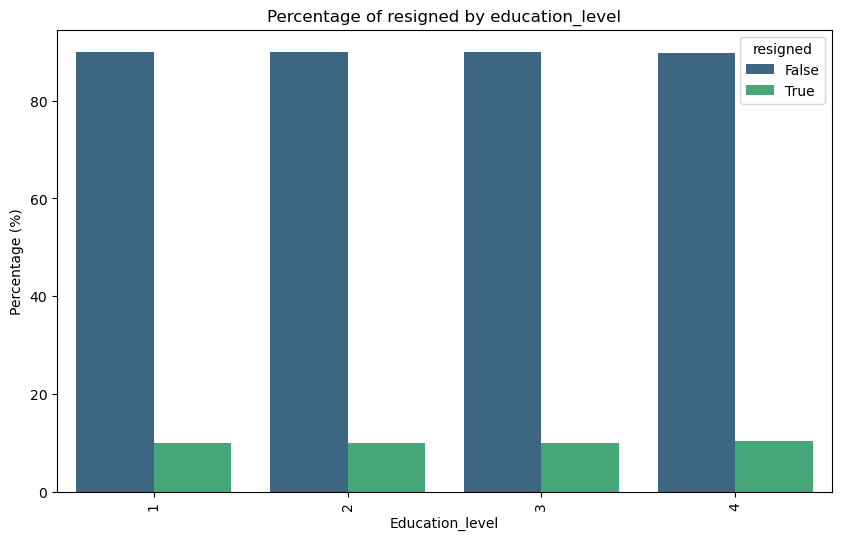

In [36]:
eda_bi_cat(data, 'education_level', 'resigned')

## EDA numerical columns

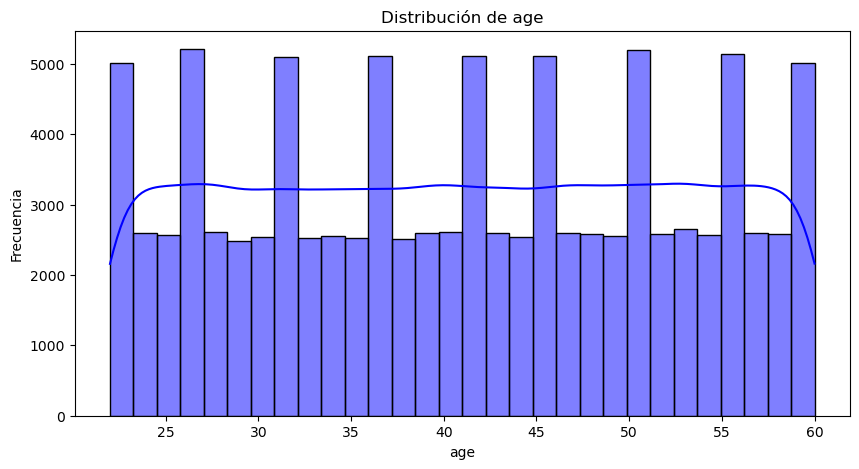

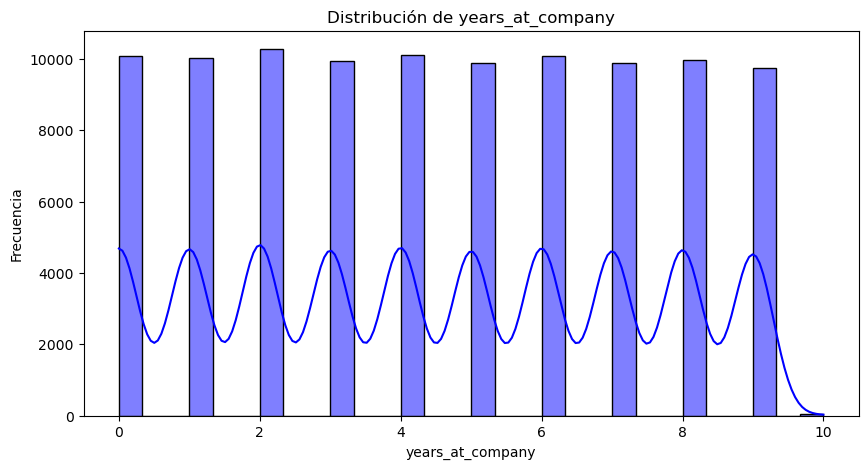

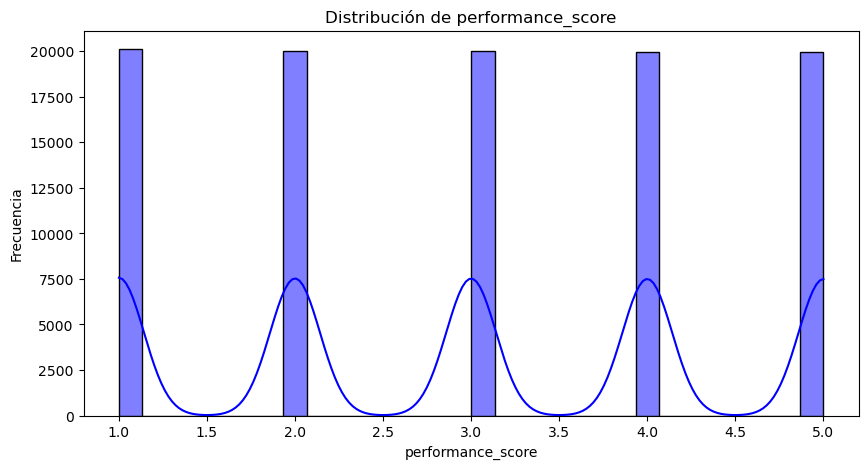

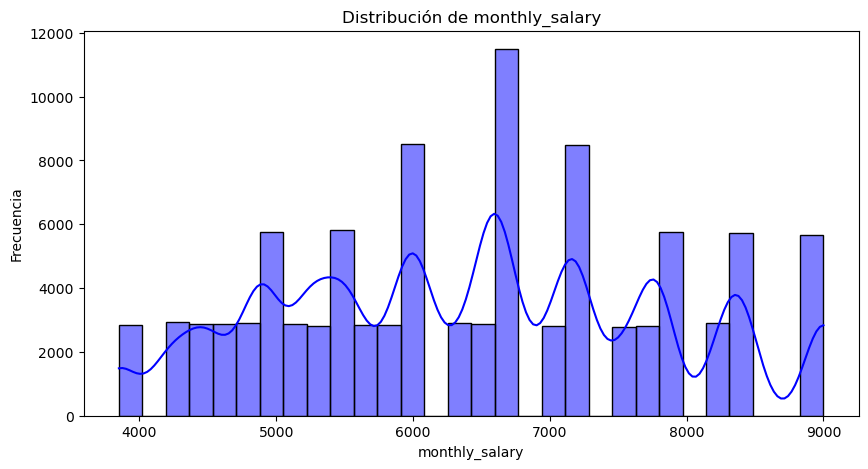

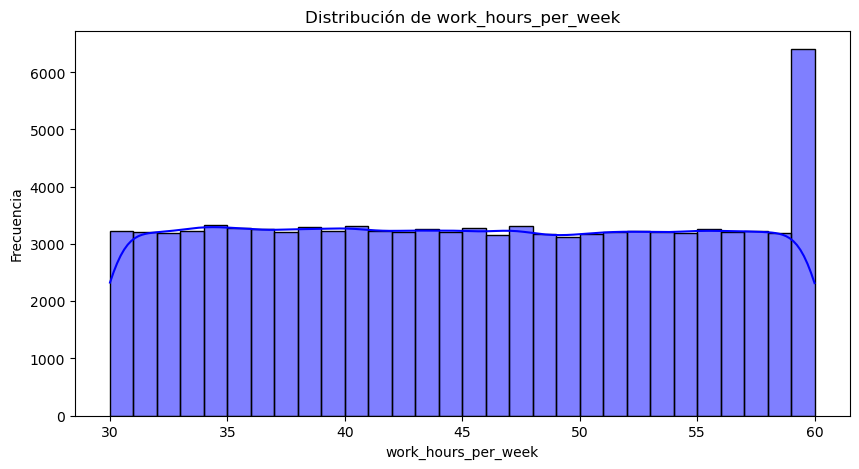

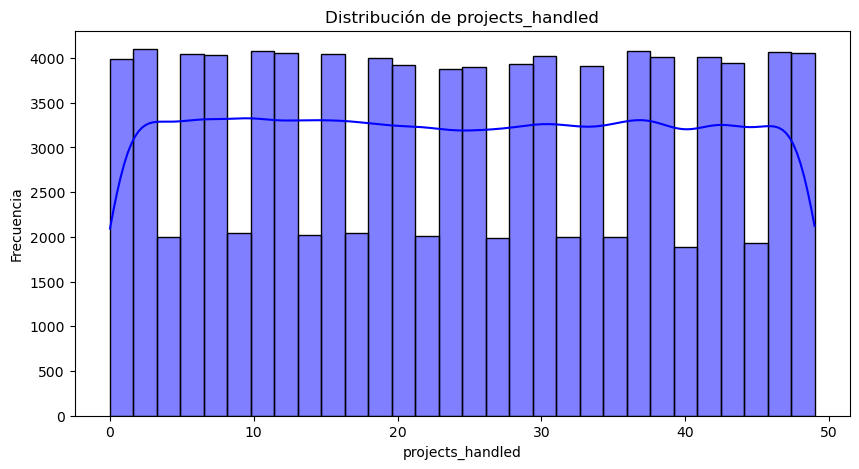

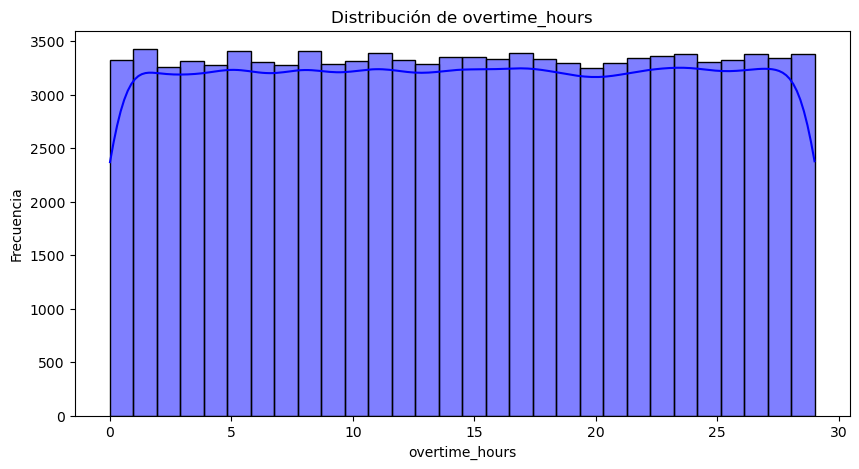

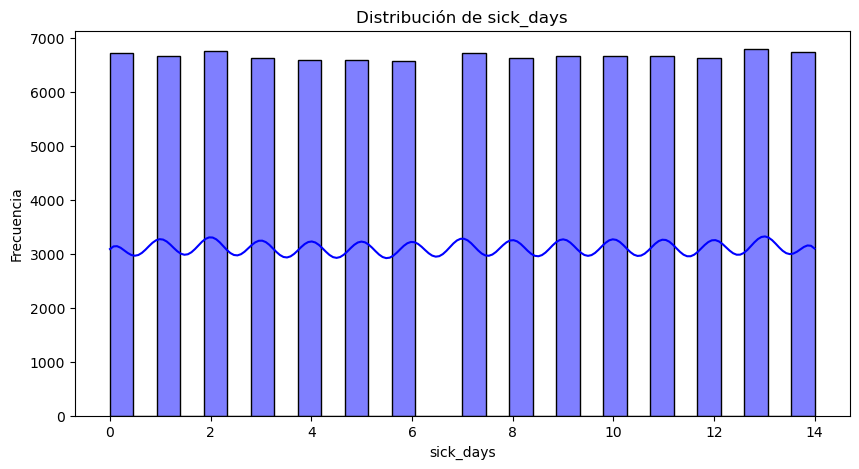

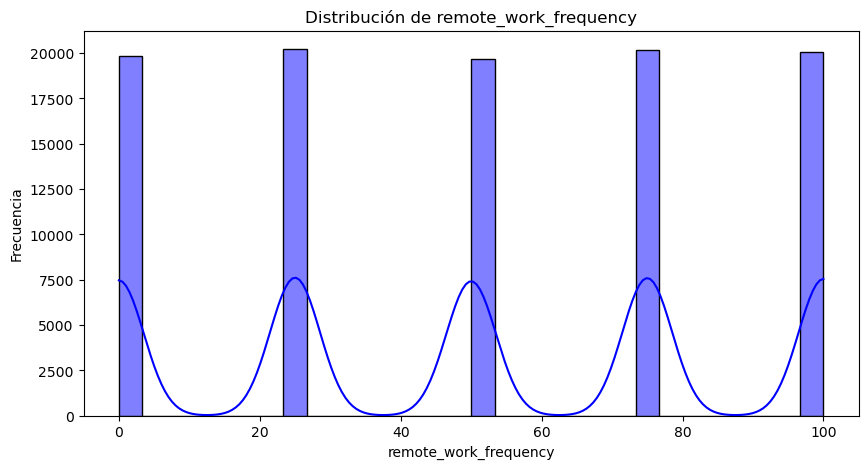

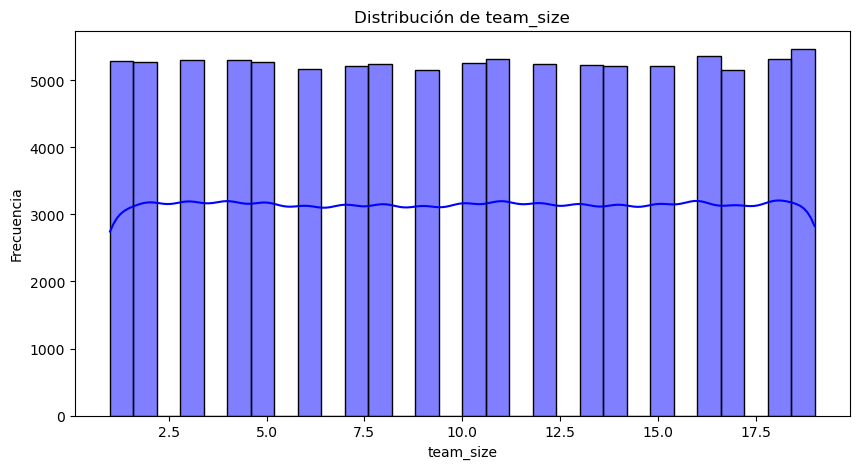

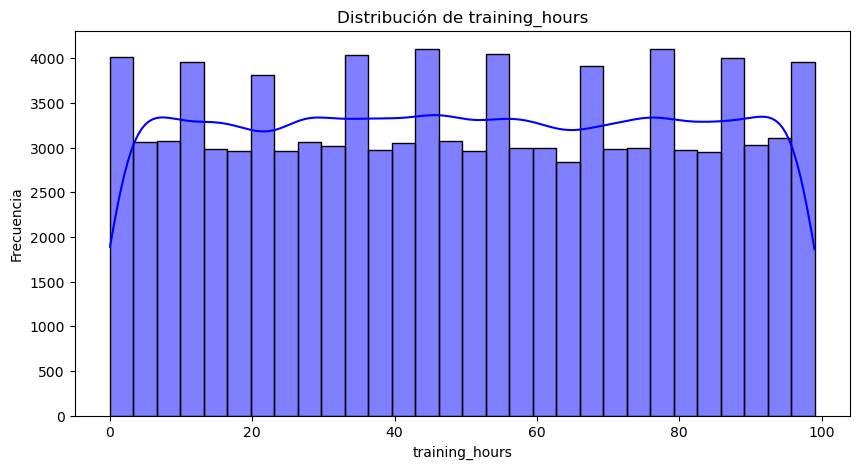

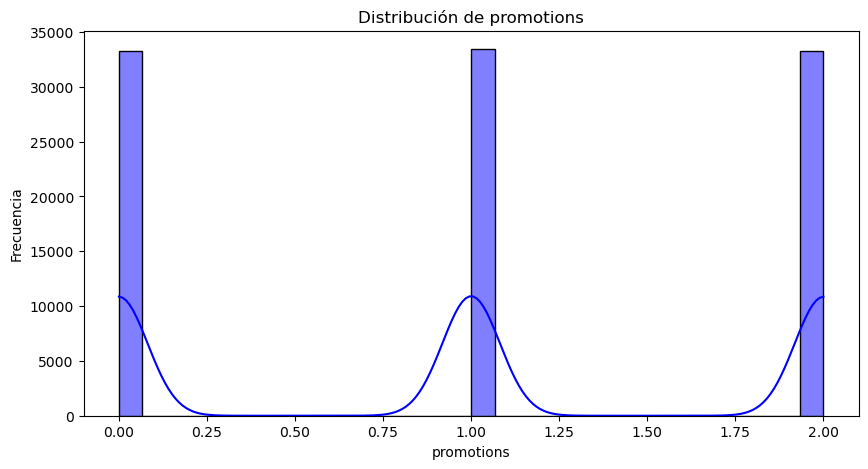

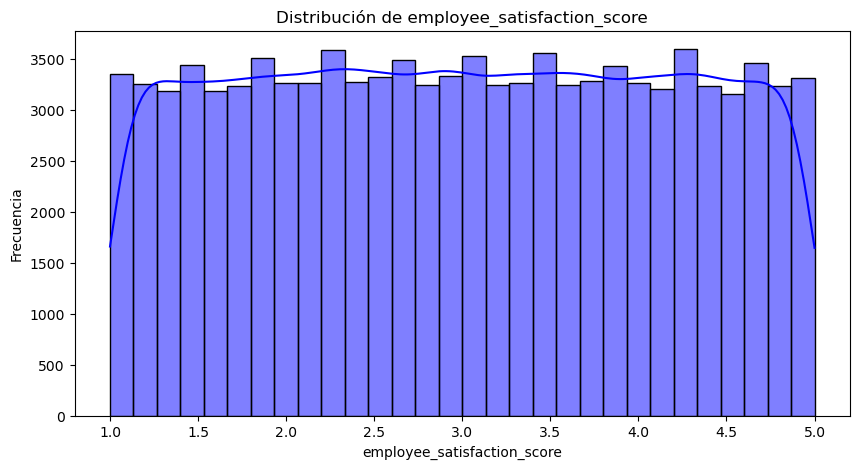

In [39]:
# Análisis univariable de variables numéricas
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

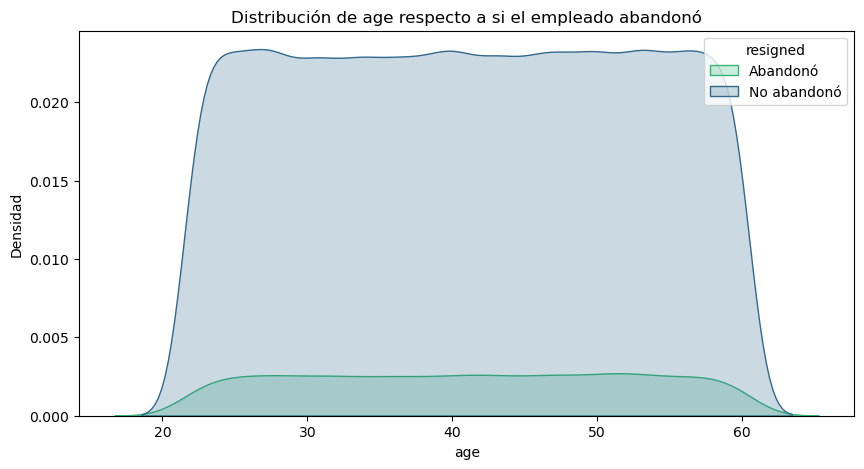

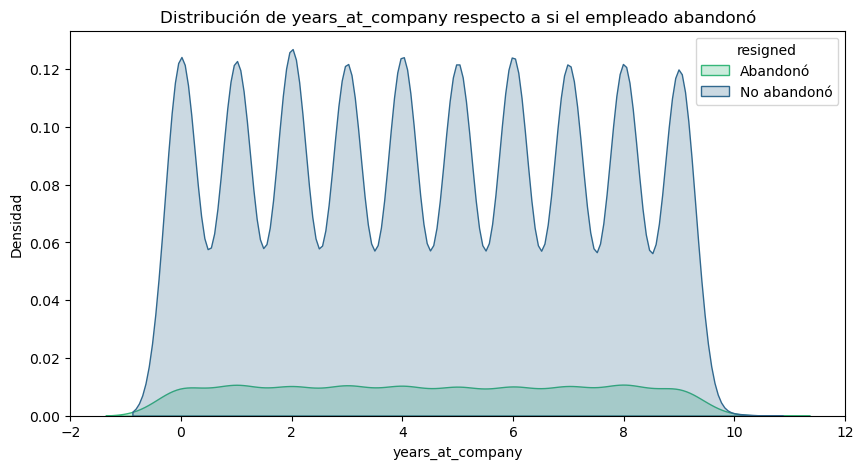

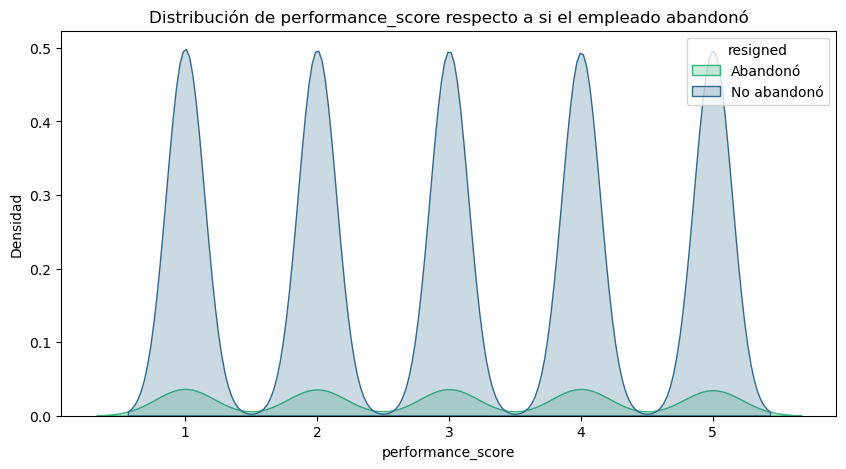

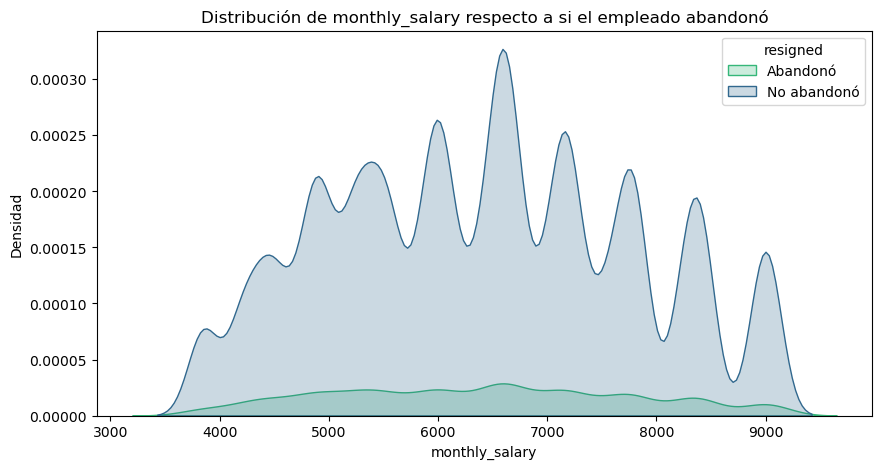

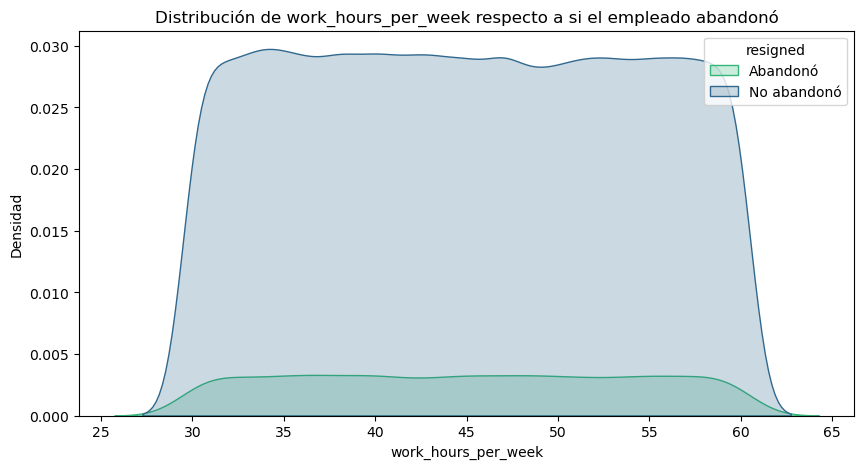

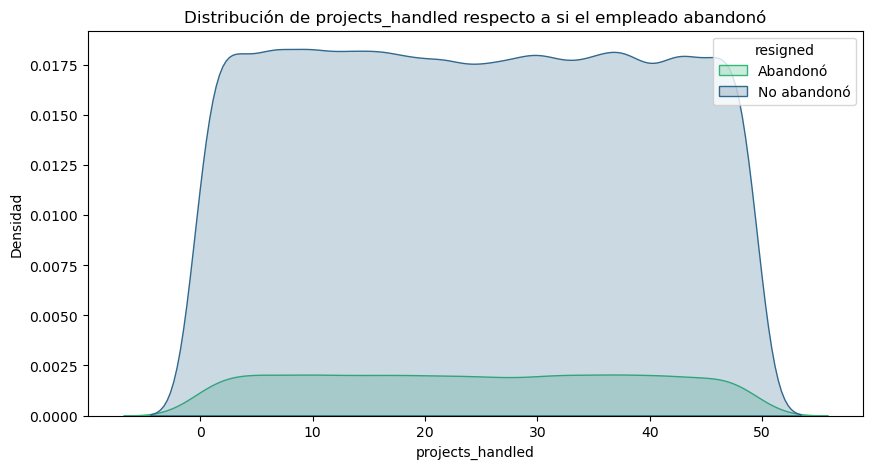

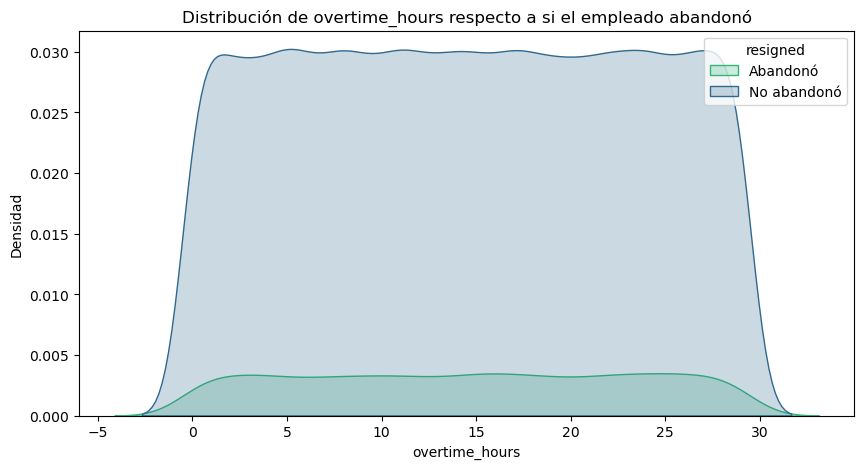

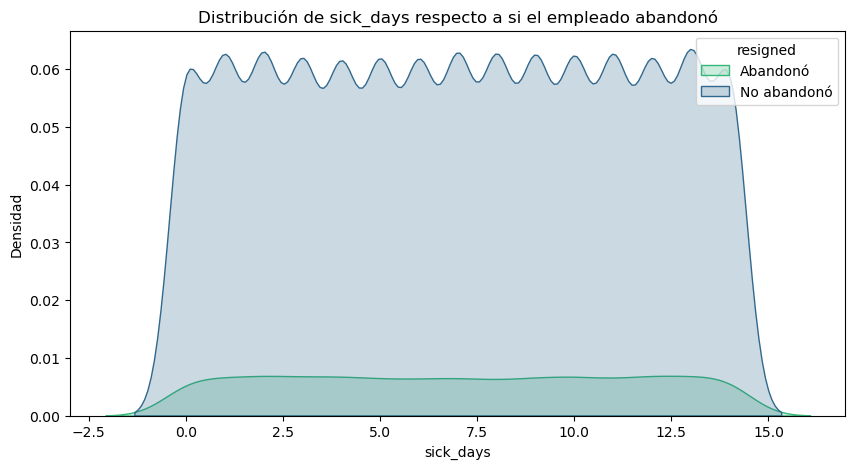

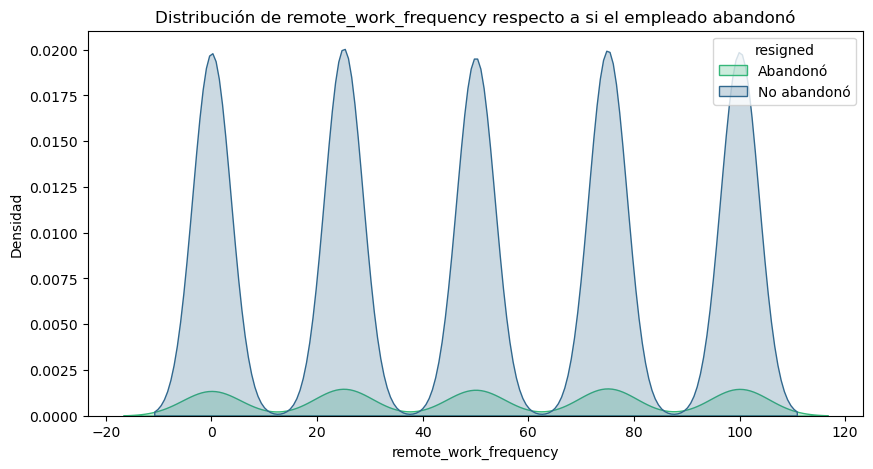

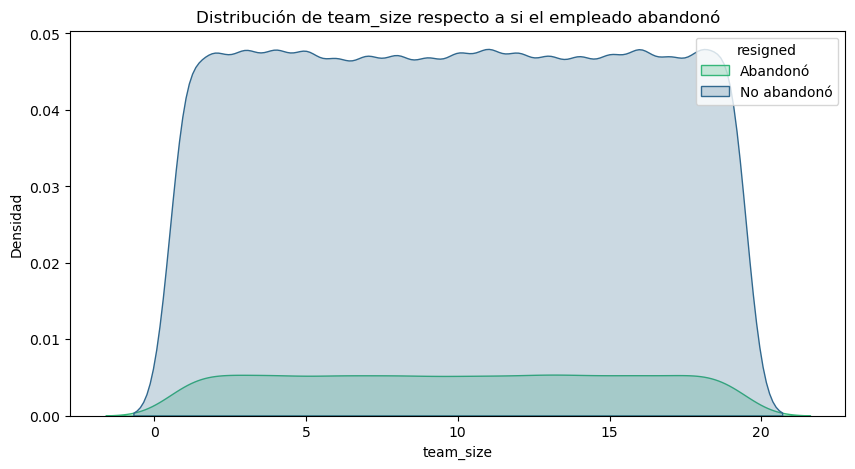

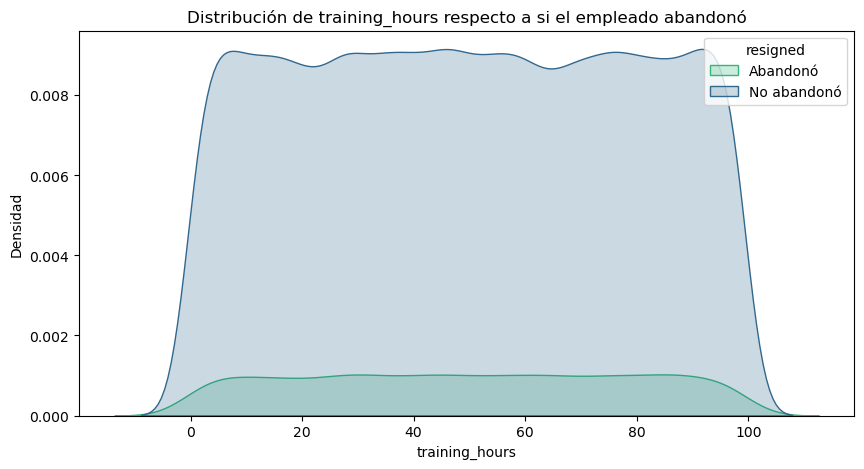

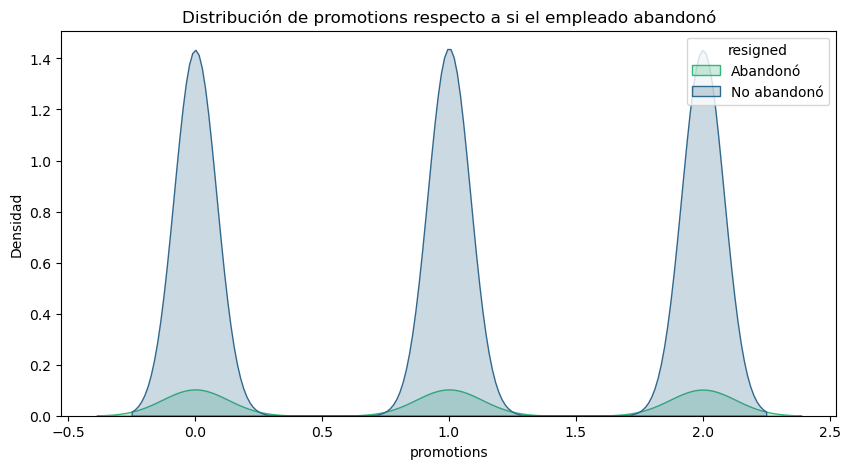

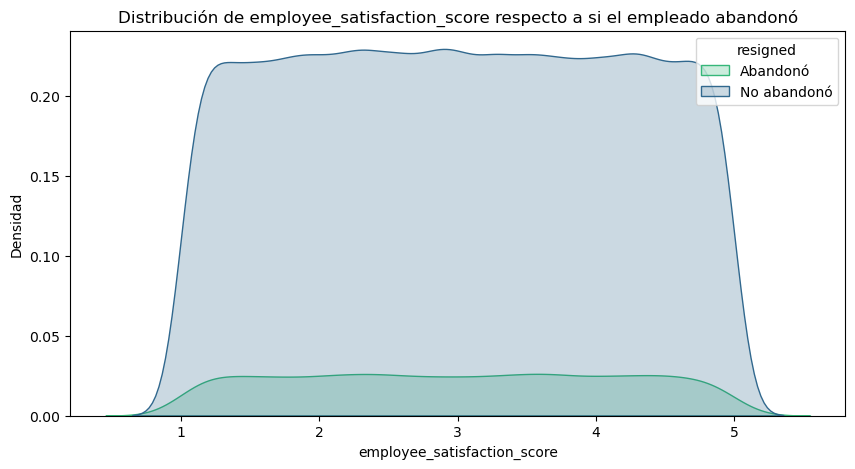

In [40]:
# Análisis bivariable de variables numéricas respecto a 'resigned'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=data, x=column, hue='resigned', fill=True, palette='viridis')
    plt.title(f'Distribución de {column} respecto a si el empleado abandonó')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend(title='resigned', labels=['Abandonó' , 'No abandonó'])
    plt.show()

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


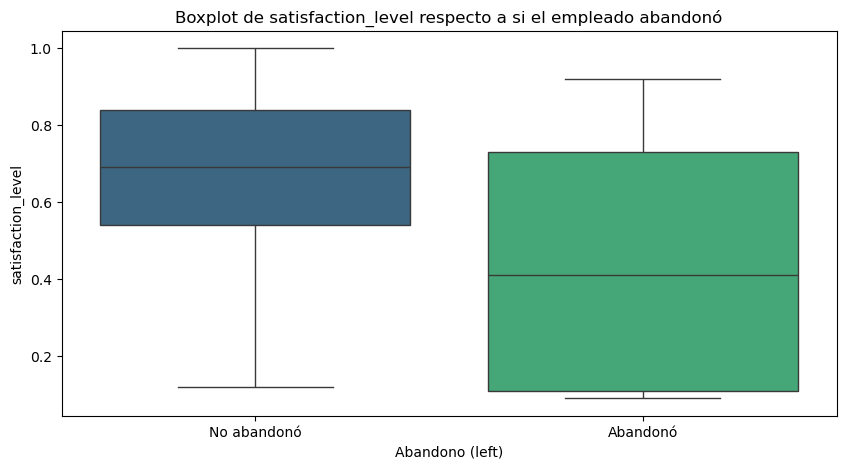

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


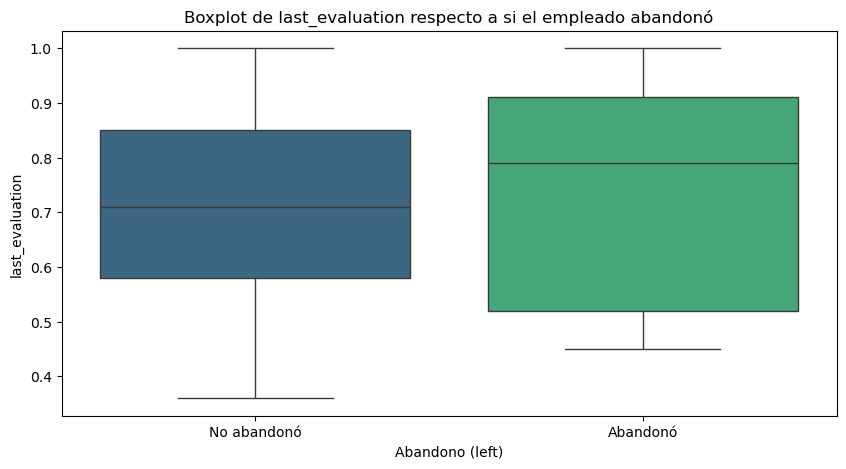

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


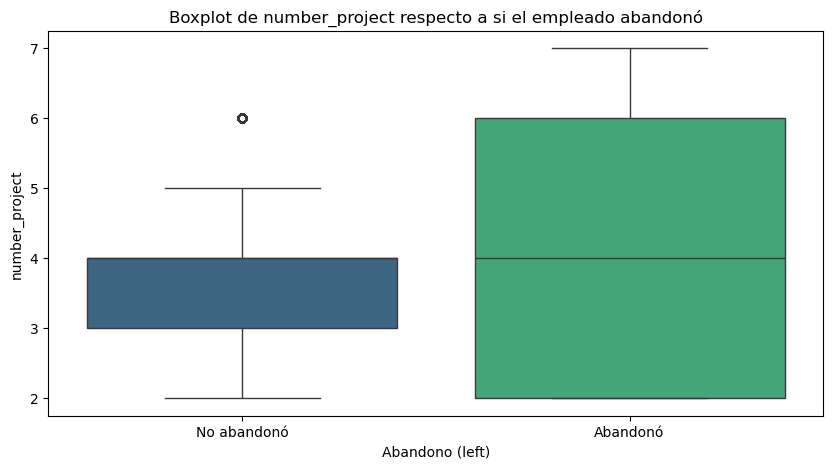

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


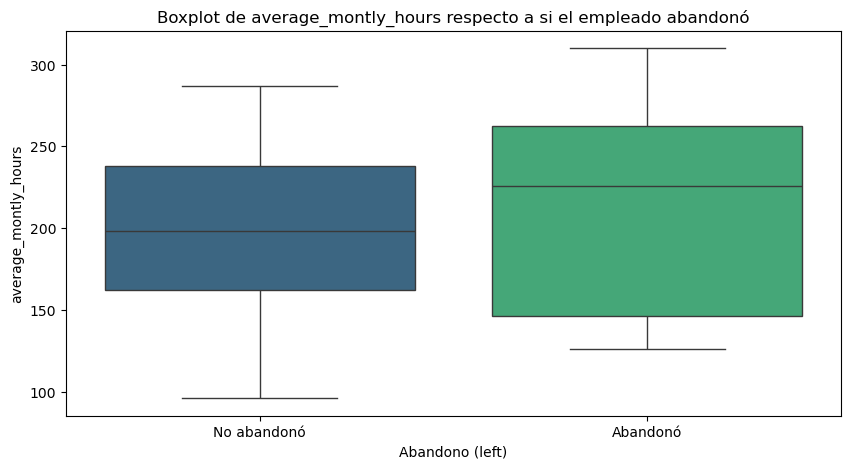

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18320\3452498451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='left', y=column, palette='viridis')


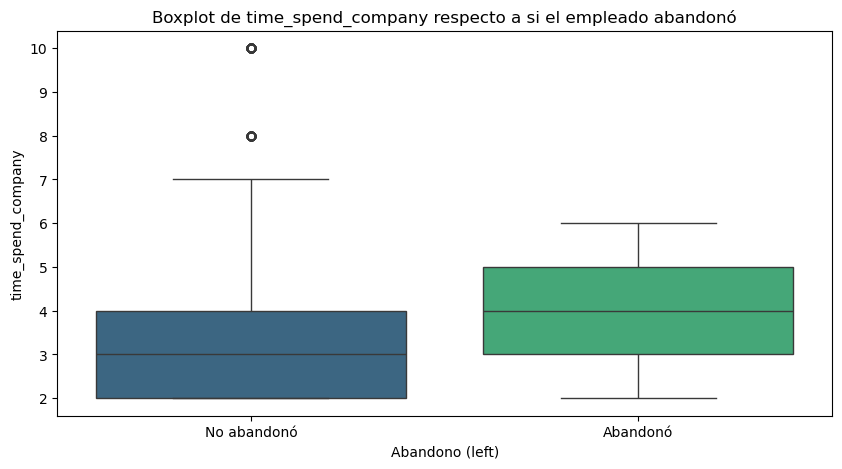

In [ ]:
# Boxplots de las variables numéricas respecto a 'left'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='left', y=column, palette='viridis')
    plt.title(f'Boxplot de {column} respecto a si el empleado abandonó')
    plt.xlabel('Abandono (left)')
    plt.ylabel(column)
    plt.xticks([0, 1], ['No abandonó', 'Abandonó'])
    plt.show()